In [13]:
from tensorflow import keras
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import utils
import tensorflow

In [5]:
data_dir = pathlib.Path("FMD_DATASET")

In [53]:
train_set = keras.utils.image_dataset_from_directory(
    data_dir,
    labels = 'inferred',
    label_mode = 'int',
    color_mode = 'rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=True,  
)
test_set = keras.utils.image_dataset_from_directory(
    data_dir,
    labels = 'inferred',
    label_mode = 'int',
    color_mode = 'rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=True,
    
    
    
)

Found 14538 files belonging to 3 classes.
Using 11631 files for training.
Found 14538 files belonging to 3 classes.
Using 2907 files for validation.


In [81]:
lab = [[x,y] for x,y in test_set]

In [118]:
y_true = lab[0][1]
x_test = lab[0][0]
for i in range(1,len(lab)):
    y_true = tensorflow.concat([y_true,lab[i][1]], axis =0 )
    x_test = tensorflow.concat([x_test,lab[i][0]], axis = 0)

In [9]:
model = keras.models.load_model('maski')

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_12 (Separa  (None, 256, 256, 64)     331       
 bleConv2D)                                                      
                                                                 
 separable_conv2d_13 (Separa  (None, 256, 256, 64)     5760      
 bleConv2D)                                                      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                                 
 separable_conv2d_14 (Separa  (None, 128, 128, 64)    

In [120]:
y_pred = model.predict(x_test)

91/91 [==============================] - 91s 725ms/step


In [121]:
y_pred1 = np.argmax(y_pred, axis = 1)

In [122]:
from sklearn.metrics import classification_report

In [123]:
print(classification_report(y_true,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1012
           1       0.98      0.95      0.97       942
           2       0.95      0.99      0.97       953

    accuracy                           0.97      2907
   macro avg       0.97      0.97      0.97      2907
weighted avg       0.97      0.97      0.97      2907



In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

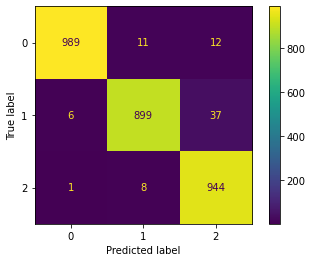

In [125]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_true,y_pred1))

disp.plot()
plt.show()